Please scroll to the two plots below.

In [1]:
#import libaries and data
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Import txt data from NSDUH 2020 survey
spd2020=pd.read_csv("/Users/Shilpi/Library/CloudStorage/GoogleDrive-shilpi.skr@gmail.com/My Drive/Python/NHS/NSDUH_2020_Tab.txt",sep="\t")
#spd2020.head(5)

# Clean data and create the required dataset

#rename id, wts, income, gender
spd2020.rename(columns={"QUESTID2":"id","ANALWTQ1Q4_C":"wts", "INCOME": "income"}, inplace="TRUE")
spd2020['year']='2020' 
# spd2020.head(5)

# #check for missing values by id, gender, income and survey weights
# spd2020['id'].isnull().values.any()
# spd2020['income'].isnull().values.any()
# spd2020['wts'].isnull().values.any()

# #get summary stats for the cleaned variables
# spd2020[["id","income","wts"]].describe().transpose()

## Create different socioeconomic variables

# create marital status variable

spd2020['IRMARIT'].isnull().values.any() #check if any missing value
spd2020['IRMARIT'].value_counts() # gives each unique category value and its frequency
#spd2020['IRMARIT'].value_counts().count() # gives number of caterories

col         = 'IRMARIT'
conditions  = [ spd2020[col] ==1, (spd2020[col] ==2) | (spd2020[col]==3), spd2020[col] == 4]
choices     = [ "Married", 'Separated/Divorced/Widowed', 'Never Married' ] 

spd2020["marital"] = np.select(conditions, choices, default=np.nan)
# spd2020[['IRMARIT','marital']].head(15)

# create education variable

spd2020['IREDUHIGHST2'].isnull().values.any() #check if any missing value
spd2020['IREDUHIGHST2'].value_counts().count() # gives number of caterories
spd2020['IREDUHIGHST2'].value_counts() # gives each unique category value and its frequency

col         = 'IREDUHIGHST2'
conditions  = [ spd2020[col] <8, spd2020[col] ==8, spd2020[col]==9, spd2020[col] >= 10]
choices     = [ '< High school', 'High school graduate', 'Some college', 'College graduate' ] 

spd2020["edu"] = np.select(conditions, choices, default=np.nan)
# spd2020[['IREDUHIGHST2','edu']].head(15)

# create income variable

spd2020['income'].isnull().values.any() #check if any missing value
spd2020['income'].value_counts().count() # gives number of caterories
spd2020['income'].value_counts() # gives each unique category value and its frequency

col         = 'income'
conditions  = [ spd2020[col] ==1, spd2020[col] ==2, spd2020[col]==3, spd2020[col] == 4]
choices     = [ '< 20K', '20-49K', '50-74K', '> 75K' ] 

spd2020["income"] = np.select(conditions, choices, default=np.nan)
# spd2020[['income']].head(15)

# create race variable

spd2020['NEWRACE2'].isnull().values.any() #check if any missing value
spd2020['NEWRACE2'].value_counts().count() # gives number of caterories
spd2020['NEWRACE2'].value_counts() # gives each unique category value and its frequency

col         = 'NEWRACE2'
conditions  = [ spd2020[col] ==1, spd2020[col] ==2, (spd2020[col]>=3) & (spd2020[col]<=6), spd2020[col] == 7]
choices     = [ 'White','Black','Other','Hispanics' ] 

spd2020["race"] = np.select(conditions, choices, default=np.nan)
# spd2020[['NEWRACE2','race']].head(15)

# create gender and sexuality variables

spd2020['AGE2'].isnull().values.any() #check if any missing value
spd2020['AGE2'].value_counts().count() # gives number of caterories
spd2020['AGE2'].value_counts() # gives each unique category value and its frequency

col         = 'AGE2'
conditions  = [ spd2020[col] <=3, (spd2020[col]>=4) & (spd2020[col]<=6),(spd2020[col]>=7) & (spd2020[col]<=10), spd2020[col] >= 11]
choices     = [ '11-14','15-17','18-21','>=22' ] 

spd2020["age"] = np.select(conditions, choices, default=np.nan)
# spd2020[['AGE2','age']].head(15)

# create gender variable

spd2020['IRSEX'].isnull().values.any() #check if any missing value
spd2020['IRSEX'].value_counts().count() # gives number of caterories
spd2020['IRSEX'].value_counts() # gives each unique category value and its frequency

spd2020["gender"]=np.where(spd2020["IRSEX"]==1, "Male","Female")
# spd2020[['IRSEX','gender']].head(15)

# create sexuality variables

spd2020['SEXIDENT'].isnull().values.any() #check if any missing value
spd2020['SEXIDENT'].value_counts().count() # gives number of caterories
spd2020['SEXIDENT'].value_counts() # gives each unique category value and its frequency

col         = 'SEXIDENT'
conditions  = [ spd2020[col] ==1, spd2020[col]==2, spd2020[col]==3,spd2020[col]>=4]
choices     = [ 'Hetrosexuals','Lesbian or gay','Bisexual','Other' ] 

spd2020["sexuality"] = np.select(conditions, choices, default=np.nan)
# spd2020[['SEXIDENT','sexuality']].head(15)

#Create Severe Pyschological Distress measures

#Function to provide score values based on response
def slvl(x):
    if x==1:
        return 4
    elif x==2:
        return 3
    elif x==3:
        return 2
    elif x==4:
        return 1
    elif (x==5) | (x==99):
        return 0
    else:
        return np.nan
    
# Function to assign the strees values for each of the survey question to indicate mentaL well-being
def assignscores(ind,vars):
    for i in range(0,len(vars)):
#         var=vars[i]
#         print("Assinging stress values for: ", var)
#         c1=spd2020[var].isnull().values.any() #check if any missing value
#         c2=spd2020[var].value_counts().count() # gives number of caterories
#         c3=spd2020[var].value_counts() # gives each unique category value and its frequency
#         print("Any missing values: ",c1)
#         print("Number of categories: ",c2)
#         print("Category details: \n", c3)
        spd2020[ind[i]]=spd2020[vars[i]].apply(slvl)
#         c4=spd2020[[var,ind[i]]].head(5)
#         print(c4)
#         c5=spd2020[ind[i]].value_counts()
#         print("New constructed variable details: \n",c5)

# Create the PAST 30 DAYS measures
ind=['nerv30','hope30','rest30','sad30','eff30','down30']
vars=['DSTNRV30','DSTHOP30','DSTRST30','DSTCHR30','DSTEFF30','DSTNGD30']
assignscores(ind,vars)
spd2020.head(5)     

# Create the PAST 12 MONTHS measures
ind=['nerv12','hope12','rest12','sad12','eff12','down12']
vars=['DSTNRV12','DSTHOP12','DSTRST12','DSTCHR12','DSTEFF12','DSTNGD12']
assignscores(ind,vars)
# spd2020.head(5)

# Calculate totals scores and associated SPD variables
spd2020['spd30summ']=spd2020['nerv30']+spd2020['hope30']+spd2020['rest30']+spd2020['sad30']+spd2020['eff30']+spd2020['down30']
spd2020['spd12summ']=spd2020['nerv12']+spd2020['hope12']+spd2020['rest12']+spd2020['sad12']+spd2020['eff12']+spd2020['down12']

spd2020['spd30']=np.where(spd2020['spd30summ']>=13,'1','0')
spd2020['spd12']=np.where(spd2020['spd12summ']>=13,'1','0')

spd2020['spd_pm']=np.where(spd2020['spd30']==1,'1','0') #past month SPD
spd2020['spd_py']=np.where((spd2020['spd12']==1) & (spd2020['spd30']==0) ,'1','0') #past year SPD but not in past month
spd2020['spd_no']=np.where((spd2020['spd12']==0) & (spd2020['spd30']==0) ,'1','0') #no SPD in last year

col         = ['spd30summ', 'spd12summ']
conditions  = [ (spd2020[col[0]]<13) & (spd2020[col[1]]<13), spd2020[col[0]]>=13, (spd2020[col[0]]<13) & (spd2020[col[1]]>=13)]
choices     = [ 'No SPD','Past-month SPD', 'Past-year SPD' ] 
spd2020['SPD'] = np.select(conditions, choices, default=np.nan)


# Cannabis users

col         = 'MJREC'
conditions  = [ spd2020[col] ==1, (spd2020[col]>=2) & (spd2020[col] <=91)]
choices     = [ 'canuser','no can user' ] 
spd2020["canuser"] = np.select(conditions, choices, default=np.nan)

# spd2020['canuser'].describe()
# spd2020['canuser'].value_counts().count() # gives number of caterories
# spd2020['spd12summ'].isnull().values.any()

# Create a new dataframe for the regression
rd=spd2020[['id','wts','year','income','marital','edu','race','age','gender','sexuality','canuser','SPD','spd30summ','spd12summ']]

# check how many rows with any missing values
rd[rd.isna().any(axis=1)]
#drop any row that has any missing value
rd=rd.dropna()

#Count proportion of obsevation in each socio-economic and Psychological category
#Number of individuals in each age, race, gender and sexuality for each SPD level
den=rd.groupby(['SPD'])['id'].count() #how many people in each stress category
#Age profile of respondent across SPD categories
# prop_age=rd.groupby(['SPD','age'])['id'].count().div(den)*100

prop_age=rd.groupby(['SPD','age'])['id'].count().div(den)*100
prop_race=rd.groupby(['SPD','race'])['id'].count().div(den)*100
prop_gender=rd.groupby(['SPD','gender'])['id'].count().div(den)*100
prop_sexuality=rd.groupby(['SPD','sexuality'])['id'].count().div(den)*100

#prop_race.to_excel('SPD_table.xlsx', sheet_name='prop_race', float_format="%.2f", header=False)

cu_spd=rd.groupby(['canuser','SPD'])['id'].count().div(rd.groupby(['SPD'])['id'].count())*100
cu_age=rd.groupby(['canuser','age'])['id'].count().div(rd.groupby(['age'])['id'].count())*100
cu_race=rd.groupby(['canuser','race'])['id'].count().div(rd.groupby(['race'])['id'].count())*100
cu_gender=rd.groupby(['canuser','gender'])['id'].count().div(rd.groupby(['gender'])['id'].count())*100
cu_sexuality=rd.groupby(['canuser','sexuality'])['id'].count().div(rd.groupby(['sexuality'])['id'].count())*100
# print(prop_age,'\n \n', prop_race,'\n \n', prop_gender,'\n \n', prop_sexuality)

#Cannabis users across income
sns.histplot(binwidth=0.5, x="canuser", hue="income", data=rd, stat="count", multiple="stack")
plt.savefig("canuser_income.png")

#Cannabis users across race
sns.histplot(binwidth=0.5, x="canuser", hue="race", data=rd, stat="count", multiple="stack")
plt.savefig("canuser_race.png")

/var/folders/qk/sjp_lpd54kv_bjtddcb3rlhc0000gn/T/ipykernel_27336/868608153.py:9: DtypeWarning: Columns (2726) have mixed types. Specify dtype option on import or set low_memory=False.
  spd2020=pd.read_csv("/Users/Shilpi/Library/CloudStorage/GoogleDrive-shilpi.skr@gmail.com/My Drive/Python/NHS/NSDUH_2020_Tab.txt",sep="\t")


There is a general perception that low income prople most prevalent users of cannabis. The plot uses data from 2020 National Survey on Drug Use and Health survey and shows the count of cannabis users by income. The graph reveals that cannabis use is high among the low income bracket however the highest user of cannabis are the upper income bracket >75K.



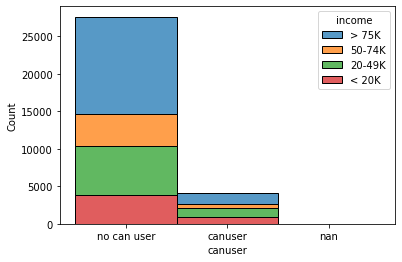

In [17]:
##Plot 1
#Cannabis users across income
sns.histplot(binwidth=0.5, x="canuser", hue="income", data=rd, stat="count", multiple="stack")
plt.savefig("canuser_income.png")


Given popoular media, news and arrest of black people for possession of cannabis, there is a general perception that black community and then hispanic community are the most prevalent users of cannabis. The plot below uses data from 2020 National Survey on Drug Use and Health survey and shows the count of cannabis users by race. The graph reveals that contary to common belif conditional on cannabis usage, it is infact the white community that uses cannabis the most.

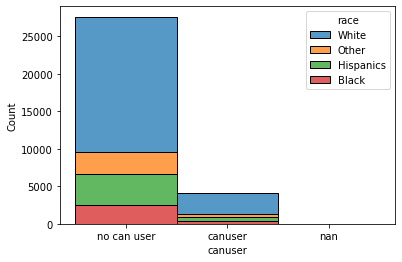

In [16]:
##Plot 2
#Cannabis users across race
sns.histplot(binwidth=0.5, x="canuser", hue="race", data=rd, stat="count", multiple="stack")
plt.savefig("canuser_race.png")